In [2]:
import pandas as pd
import numpy as np
import boto3
import botocore
import pprint
import psycopg2
import configparser
import sql_queries
import matplotlib.pyplot as plt

### Cargar Archivo

In [36]:
dataset=pd.DataFrame(pd.read_csv("vgsales.csv"))
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Explorar Datos

In [38]:
##Columnas
dataset.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [39]:
##Estandarizar nombres de columnas (minusculas)
dataset.columns= dataset.columns.str.lower()
print(dataset)

        rank                                              name platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         year         genre   publisher  na_sales  eu_sales  jp_sales  \
0      2006.0        Sport

In [6]:
##Tipo Datos
dataset.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [7]:
##Cantidad de registros y forma
dataset.shape

(16598, 11)

In [8]:
##Valores Unicos Name
dist_name=len(dataset['name'].unique())
print(dist_name)

11493


In [9]:
##Valores Unicos Genero
dist_gene=len(dataset['genre'].unique())

In [10]:
##Valores Unicos Plataforma
dist_plat=len(dataset['platform'].unique())

In [11]:
##Valores Unicos Publisher
dist_pub=len(dataset['publisher'].unique())

In [12]:
##Valores Unicos Año
dist_year=len(dataset['year'].unique())

In [13]:
##Se verifica si existen valores nulos en cada columna del dataset
dataset.isnull().any()

rank            False
name            False
platform        False
year             True
genre           False
publisher        True
na_sales        False
eu_sales        False
jp_sales        False
other_sales     False
global_sales    False
dtype: bool

In [76]:
##Verificar Valores Nulos
print(dataset['publisher'].isnull().values.any())
print(dataset['year'].isnull().values.any())
print(dataset['platform'].isnull().values.any())
print(dataset['genre'].isnull().values.any())
print(dataset['name'].isnull().values.any())

True
True
False
False
False


In [77]:
##Sustituir valores Nulos en Year
dataset['year'].fillna(9999, inplace=True)

In [14]:
##Sustituir valores Nulos en Publisher
dataset['publisher'].fillna('Valor Nulo', inplace=True)

#### Crear Dimension Producto

In [184]:
name_=pd.DataFrame(dataset['name']).drop_duplicates()
name_.index.name='index'
name_['id']=pd.factorize(name_['name'], sort=True)[0]+1
name_=name_.sort_values('name', ascending=True).reset_index(drop=True)


In [185]:

id_product=(np.arange(1,dist_name+1,1)) ##Se crea el ID como un arreglo de 1 hasta la cantidad de valores unicos
name=dataset['name'].unique() ##Se extraen los valores unicos
product={'id_product':id_product,'name':name}##Se crea un diccionario con las variables anteriores

dim_product=pd.DataFrame(product) ##Se convierte el diccionario en data frame


#### Crear dataset de Dimension Genero

In [186]:
id_genero=(np.arange(1,dist_gene+1,1)) ##Se crea el ID como un arreglo de 1 hasta la cantidad de valores unicos
genero=dataset['genre'].unique() ##Se extraen los valores unicos
genre={'id_genero':id_genero,'genre':genero} ##Se crea un diccionario con las variables anteriores

dim_genero=pd.DataFrame(genre) ##Se convierte el diccionario en data frame



#### Crear dataset de Dimension Plataforma

In [187]:
id_plataforma=(np.arange(1,dist_plat+1,1)) ##Se crea el ID como un arreglo de 1 hasta la cantidad de valores unicos
plataforma=dataset['platform'].unique() ##Se extraen los valores unicos
platform={'id_plataforma':id_plataforma,'platform':plataforma} ##Se crea un diccionario con las variables anteriores

dim_plataforma=pd.DataFrame(platform) ##Se convierte el diccionario en data frame



#### Crear dataset de Dimension Publisher

In [188]:
id_publisher=(np.arange(1,dist_pub+1,1)) ##Se crea el ID como un arreglo de 1 hasta la cantidad de valores unicos
publisher=dataset['publisher'].unique() ##Se extraen los valores unicos
editora={'id_publisher':id_publisher,'publisher':publisher} ##Se crea un diccionario con las variables anteriores

dim_publisher=pd.DataFrame(editora) ##Se convierte el diccionario en data frame


In [170]:
anios=dataset['year']=dataset['year'].astype('Int64')
anios=pd.DataFrame(anios)
intervalos = [1979,1990,2000,2010,2020,2029]
etiquetas = ['1980-1989','1990-1999','2000-2009','2010-2019', '2020-2029']
anios['year']=anios['year'].drop_duplicates()
anios=anios.dropna()
anios.index.name='index'
anios['rango']=pd.cut(anios['year'],bins=intervalos,labels=etiquetas, duplicates='drop')
#anios['rango']=anios['rango'].fillna('Unknown')
anios['id']=pd.factorize(anios['rango'], sort=True)[0]+1
anios=anios.reset_index(drop=True)
#(anios['rango'] =='').any()

In [175]:
anios=dataset['year']=dataset['year'].astype('Int64') #Se convierten los datos a números enteros
anios=pd.DataFrame(anios) #Se convierte en un DataFrame
intervalos = [0,1979,1990,2000,2010,2020,2030] #Se establecen los criterios de los intervalos
etiquetas = ['Unknown','1980-1989','1990-1999','2000-2009','2010-2019', '2020-2029'] #Se establecen las etiquetas de los intervalos
anios['year']=anios['year'].drop_duplicates() #Se quitan duplicados
anios=anios.dropna() #Se quitan valores vacíos
anios.index.name='index' #Se define la columna index como índice
anios['rango']=pd.cut(anios['year'],bins=intervalos,labels=etiquetas, duplicates= 'drop', include_lowest=True, right=False).fillna('Unknown') #Se realiza la segmentación o binning para poder aplicar intervalos dentro del DataFrame
anios['id']=pd.factorize(anios['rango'], sort=True)[0]+1 #Se establece la columna de ids
anios=anios.sort_values('year', ascending=True).reset_index(drop=True) #Se ordenan y se reinicia el conteo
anios.to_excel('dim_anios.xlsx', index=False) #Se exporta a un documento formato Excel.


#### Crear dataset de Dimension Año

In [40]:
year=dataset['year'].unique() ##Se extraen los valores unicos

id_category=[]
category_year=[]

for y in year: ##Por cada valor unico en Year se crean dos arreglos para categorizar los años en grupos de 10 en 10 años

    if y>=1980 and y<=1989:
        id_category.append(1)
        category_year.append('1980-1989')

    elif y>=1990 and y<=1999:
        id_category.append(2)
        category_year.append('1990-1999')

    elif y>=2000 and y<=2009:
        id_category.append(3)
        category_year.append('2000-2009')

    elif y>=2010 and y<=2019:
        id_category.append(4)
        category_year.append('2010-2019')

    elif y>=2020 and y<=2029:
        id_category.append(5)
        category_year.append('2020-2029')
    else:
        id_category.append(6)
        category_year.append('Unknow')     

años={'year':year,'id_category':id_category,'category_year':category_year} ##Se crea un diccionario con las variables anteriores

dim_year=pd.DataFrame(años) ##Se convierte el diccionario en data frame


dim_year.to_excel('dim_year.xlsx',index=False) ##Se vuelve archivo excel para cargar a S3



#### Crear dataset de Fact Table

In [194]:

dataset_prod=dataset.merge(dim_product,on='name',how='inner') ##Merge del dataset para colocar ID_Producto a la Fact
dataset_prod_gen=dataset_prod.merge(dim_genero,on='genre',how='inner') ##Merge de dataset nuevo para colocar ID_Genero a la Fact
dataset_prod_gen_plat=dataset_prod_gen.merge(dim_plataforma,on='platform',how='inner') ##Merge de dataset nuevo para colocar ID_Plataforma a la Fact
dataset_prod_gen_plat_pub=dataset_prod_gen_plat.merge(dim_publisher,on='publisher',how='inner') ##Merge de dataset nuevo para colocar ID_Publisher a la Fact
dataset_prod_gen_plat_pub['id_sales']=pd.factorize(dataset_prod_gen_plat_pub['rank'], sort=True)[0]+1 ##Se crea el ID de la Fact table como un arreglo de 1 hasta la cantidad de registros
#dataset_prod_gen_plat_pub['id_sales']=np.arange(1,16599,1) ##Se crea el ID de la Fact table como un arreglo de 1 hasta la cantidad de registros
dataset_prod_gen_plat_pub.drop(['name','platform','genre','publisher',],axis=1,inplace=True) ##Eliminar columnas para solo dejar Ids



In [ ]:
fact_sales=dataset_prod_gen_plat_pub[['id_sales','id_product','id_plataforma','year','id_genero','id_publisher','na_sales','eu_sales',
                                      'jp_sales','other_sales','global_sales','rank']] ##Ordenar la tabla de Hechos

fact_sales.to_excel('fact_sales.xlsx',index=False) ##Se vuelve archivo a excel para cargar a S3

## Creación Base de datos

#### Iniciación de Variables

In [ ]:
rdsIdentifier = 'vgames-db' #nombre de la instancia

#### Cargamos archivo de configuraciones

In [ ]:
config = configparser.ConfigParser()
config.read('escec.cfg')

['escec.cfg']

### Creamos Instancia de RDS

In [ ]:
aws_conn = boto3.client('rds', aws_access_key_id=config.get('IAM', 'ACCESS_KEY'),
                     aws_secret_access_key=config.get('IAM', 'SECRET_ACCESS_KEY'),
                     region_name='us-east-1')

#### Verificamos Instancias de RDS disponibles

In [ ]:
rdsInstanceIds = []

response = aws_conn.describe_db_instances()
for resp in response['DBInstances']:
    rdsInstanceIds.append(resp['DBInstanceIdentifier'])
    db_instance_status = resp['DBInstanceStatus']

print(f"DBInstanceIds {rdsInstanceIds}")

DBInstanceIds []


#### Creación de Servicio RDS

In [ ]:
try:
    response = aws_conn.create_db_instance(
            AllocatedStorage=10,
            DBName=config.get('RDS', 'DB_NAME'),
            DBInstanceIdentifier=rdsIdentifier,
            DBInstanceClass="db.t3.micro",
            Engine="postgres",
            MasterUsername=config.get('RDS', 'DB_USER'),
            MasterUserPassword=config.get('RDS', 'DB_PASSWORD'),
            Port=int(config.get('RDS', 'DB_PORT')),
            VpcSecurityGroupIds=[config.get('VPC', 'SECURITY_GROUP')],
            PubliclyAccessible=True
        )
    print(response)
except aws_conn.exceptions.DBInstanceAlreadyExistsFault as ex:
    print("La Instancia de Base de Datos ya Existe.")

##Esperar para consultar información de la instancia

La Instancia de Base de Datos ya Existe.


##### Obtenemos URL del Host

In [ ]:
try:
     instances = aws_conn.describe_db_instances(DBInstanceIdentifier=rdsIdentifier)
     RDS_HOST = instances.get('DBInstances')[0].get('Endpoint').get('Address')
     print(RDS_HOST)
except Exception as ex:
     print("La instancia de base de datos no existe o aun no se ha terminado de crear.")
     print(ex)

vgames-db.c1o7eqlyitvy.us-east-1.rds.amazonaws.com


##### Conexión a Base de Datos desde Python

In [ ]:
import sql_queries

try:
    db_conn = psycopg2.connect(
        database=config.get('RDS', 'DB_NAME'), 
        user=config.get('RDS', 'DB_USER'),
        password=config.get('RDS', 'DB_PASSWORD'), 
        host=RDS_HOST,
        port=config.get('RDS', 'DB_PORT')
    )

    cursor = db_conn.cursor()
    cursor.execute(sql_queries.DDL_QUERY)
    db_conn.commit()
    print("Base de Datos Creada Exitosamente")
except Exception as ex:
    print("ERROR: Error al crear la base de datos.")
    print(ex)

Base de Datos Creada Exitosamente


##### Insertamos Datos en las Tablas

###### Se crea funcion para instertar datos

In [ ]:
def insertDataToSQL(df_data, table_name):
     postgres_driver = f"""postgresql://{config.get('RDS', 'DB_USER')}:{config.get('RDS', 'DB_PASSWORD')}@{RDS_HOST}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""    
     
     try:
          response = df_data.to_sql(table_name, postgres_driver, index=False, if_exists='append')
          print(f'Se han insertado {response} nuevos registros.' )
     except Exception as ex:
          print(ex)

###### Se instertan datos en Dimension Producto

In [ ]:
insertDataToSQL(dim_product,'dim_product')

Se han insertado 493 nuevos registros.


###### Se instertan datos en Dimension Genero

In [ ]:
insertDataToSQL(dim_genero,'dim_genero')

Se han insertado 12 nuevos registros.


###### Se instertan datos en Dimension Plataforma

In [ ]:
insertDataToSQL(dim_plataforma,'dim_plataforma')

Se han insertado 31 nuevos registros.


###### Se instertan datos en Dimension Publisher

In [ ]:
insertDataToSQL(dim_publisher,'dim_publisher')

Se han insertado 579 nuevos registros.


##### Lectura de Archivo desde S3 para dimension Año y Fact Table

In [ ]:
s3 = boto3.resource(
    service_name = 's3',
    region_name = 'us-east-1',
    aws_access_key_id = config.get('IAM', 'ACCESS_KEY'),
    aws_secret_access_key = config.get('IAM', 'SECRET_ACCESS_KEY')
)

In [ ]:
for bucket in s3.buckets.all():
    S3_BUCKET_NAME = bucket.name
    print(bucket.name)

bucket-proy-final-fact
bucket-proy-final-year


In [ ]:
#extraemos todo lo que está en el bucket para dim_year
S3_BUCKET_NAME = 'bucket-proy-final-year' ##Ingresar el nombre del bucket

remoteFileList = []
for objt in s3.Bucket(S3_BUCKET_NAME).objects.all():
    remoteFileList.append(objt.key)

remoteFileList

['dim_year.xlsx']

###### leer data de S3 para dim_year

In [ ]:
import io

for remoteFile in remoteFileList:
    try:
        file = s3.Bucket(S3_BUCKET_NAME).Object(remoteFile).get()
        data = file['Body'].read()
        df_year = pd.read_excel(io.BytesIO(data), engine='openpyxl')
    except Exception as ex:
        print("No es un archivo.")
        print(ex)

df_year

###### Se instertan datos en Dimension Year

In [ ]:
insertDataToSQL(df_year,'dim_year')

Se han insertado 40 nuevos registros.


In [ ]:
#extraemos todo lo que está en el bucket para fact table
S3_BUCKET_NAME = 'bucket-proy-final-fact' ##Ingresar el nombre del bucket

remoteFileList = []
for objt in s3.Bucket(S3_BUCKET_NAME).objects.all():
    remoteFileList.append(objt.key)

remoteFileList



['fact_sales.xlsx']

###### leer data de S3 para fact sales

In [ ]:
import io

for remoteFile in remoteFileList:
    try:
        file = s3.Bucket(S3_BUCKET_NAME).Object(remoteFile).get()
        data = file['Body'].read()
        df_fact = pd.read_excel(io.BytesIO(data), engine='openpyxl')
    except Exception as ex:
        print("No es un archivo.")
        print(ex)

df_fact

,id_sales,id_product,id_plataforma,year,id_genero,id_publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,rank
0,1,1,1,2006,1,1,41.49,29.02,3.77,8.46,82.74,1
1,2,4,1,2009,1,1,15.75,11.01,3.28,2.96,33.00,4
2,3,14,1,2007,1,1,8.94,8.03,3.60,2.15,22.72,14
3,4,15,1,2009,1,1,9.09,8.59,2.53,1.79,22.00,15
4,5,501,1,2007,1,1,1.07,1.06,0.24,0.25,2.62,582
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,8803,8,1995,11,415,0.00,0.00,0.05,0.00,0.05,12905
16594,16595,10982,22,2007,7,552,0.00,0.00,0.02,0.00,0.02,15902
16595,16596,8364,22,1998,11,409,0.00,0.00,0.06,0.00,0.06,12271
16596,16597,10725,27,1995,1,540,0.00,0.00,0.02,0.00,0.02,15556


In [ ]:
insertDataToSQL(df_fact,'fact_sales')

Se han insertado 598 nuevos registros.


### Analisis de datos y metricas

In [ ]:
postgres_driver = f"""postgresql://{config.get('RDS', 'DB_USER')}:{config.get('RDS', 'DB_PASSWORD')}@{RDS_HOST}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""

In [ ]:
##VENTAS GLOBALES POR GENERO DE VIDEO JUEGO
sql_query = '''SELECT g.genre,sum(f.global_sales) as Ventas_Total
                FROM fact_sales AS f
                LEFT JOIN dim_genero AS g
                ON f.id_genero=g.id_genero
                GROUP BY g.genre
                ORDER BY Ventas_Total DESC'''
sales_genero = pd.read_sql(sql_query, postgres_driver)
sales_genero

,genre,ventas_total
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


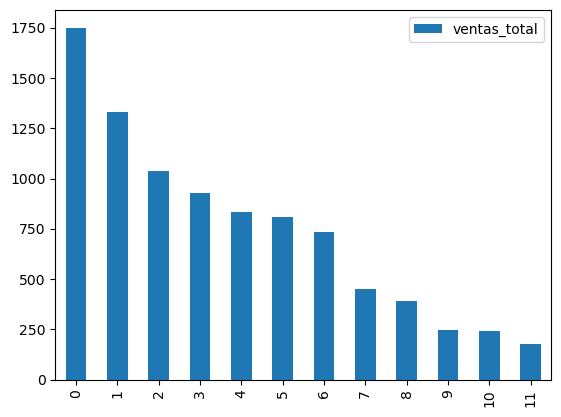

In [ ]:
sales_genero.plot(kind='bar')
plt.show()

In [ ]:
##PROMEDIO DE VENTAS POR PLATAFORMA DE VIDEO JUEGO
sql_query2 = '''SELECT p.platform,AVG(f.global_sales) as Mean_Sales
                FROM fact_sales AS f
                LEFT JOIN dim_plataforma AS p
                ON f.id_plataforma=p.id_plataforma
                GROUP BY p.platform
                ORDER BY Mean_Sales DESC'''
mean_platform = pd.read_sql(sql_query2, postgres_driver)
mean_platform

,platform,mean_sales
0,GB,2.606633
1,NES,2.561939
2,GEN,1.050370
3,SNES,0.837029
4,PS4,0.827679
5,X360,0.774672
6,2600,0.729925
7,PS3,0.720722
8,Wii,0.699404
9,N64,0.686144
